# PyLPR: Using darknet and YOLOv4 to build a custom license plate recognition tool.
Author: Fnu Yash

# STEP 1: Enable the GPU in your collab notebok
Steps:

1. Click the "**Edit**" button located at the top left of your notebook.
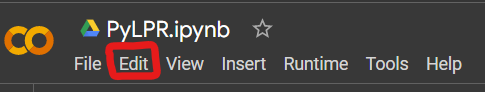

2. Click the "**Notebook Settings**: button once inside the dropdown.
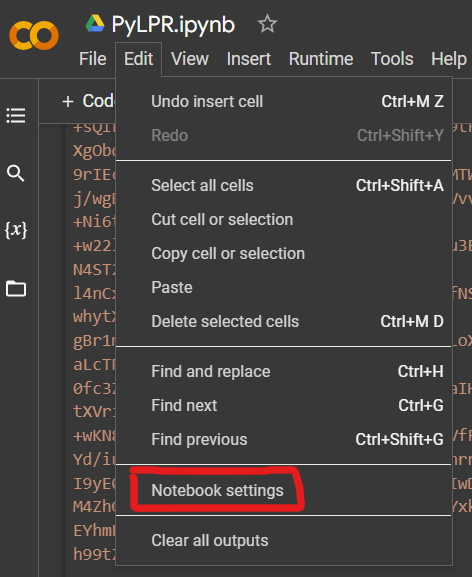

3. Select the "**GPU**" button from the "**Hardware accelerator**" dropdown.
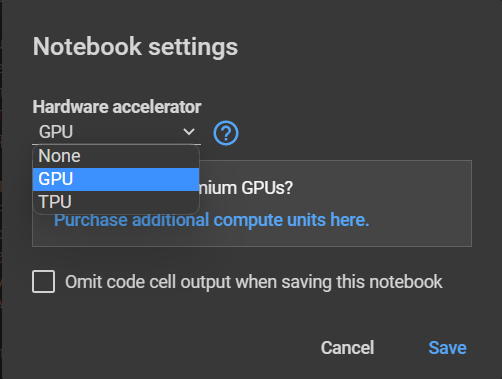

4. Click the blue "**SAVE**" button.
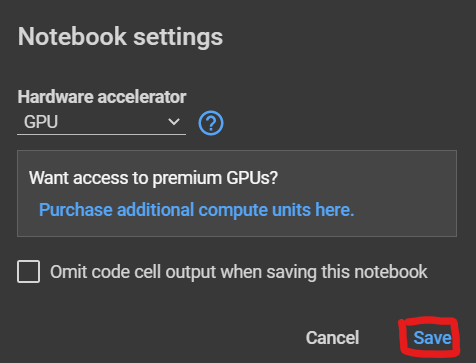

Your notebook will now have the cloud GPU enabled!

# Step 2: Cloning and Building Darknet

The following set of commands will clone darknet from AlexeyAB's repository, adjust the Makefile to enable OPENCV and GPU for darknet, and then build darknet.

NOTE: When the "**!make**" cell is run ignore any warnings that appear.

In [ ]:
# clone darknet repo

!git clone https://github.com/AlexeyAB/darknet

In [ ]:
# change the Makefile to enable OPENCV and GPU

%cd darknet
!sed -i "s/OPENCV=0/OPENCV=1/" Makefile
!sed -i "s/GPU=0/GPU=1/" Makefile
!sed -i "s/CUDNN=0/CUDNN=1/" Makefile
!sed -i "s/CUDNN_HALF=0/CUDNN_HALF=1/" Makefile

In [ ]:
# verify CUDA

!/usr/local/cuda/bin/nvcc --version

In [ ]:
# build darknet so you can use the darknet executable file to train and run object detectors.

!make

# Step 3: Download pre-trained YOLOv4 weights

YOLOv4 has been pre-trained on the 80+ classes of the coco dataset which it can predict. To run our initial tests and demo, we will use those weights and run YOLOv4 on the pretrained classes.

In [ ]:
# download pre-trained YOLOv4 weights

!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

# Step 4: Define helper functions

We will predefine 3 functions to be used later:
1. "**imShow**" will output your image with the detections on it to the window.
2. "**upload**" will upload the image you are working on to your Cloud VM.
3. "**download**" will download the image to your local device at the path provided.

In [ ]:
# define "imShow"

def imShow(path):
  import cv2
  import matplotlib.pyplot as matplt
  %matplotlib inline

  image = cv2.imread(path)
  height = image.shape[0]
  width = image.shape[1]
  image_resized = cv2.resize(image, (3 * width, 3 * height), interpolation = cv2.INTER_CUBIC)

  img = matplt.gcf()
  img.set_size_inches(18, 10)
  matplt.axis("off")
  matplt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
  matplt.show()

# define upload

def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, "wb") as f:
      f.write(data)
      print("saved file", name)

# define download

def download(path):
  from google.colab import files
  files.download(path)

# Step 5: Run your detections with darknet and YOLOv4

Now your darknet is built and ready to run detections using YOLOv4! The dataset is pretrained with coco classes located here: [COCO CLASSES](https://cocodataset.org/#explore)

The object detector can be run using the following command:
```
!./darknet detector test <path to .data file> <path to configuration> <path to weights> <path to image>
```

**NOTE:** OpenCV can not open the image in the google colab so we must run:
```
imShow("predictions.jpg")
```

This will output the image with detections applied on it.  The most recent detection will be saved as "predictions.jpg".

In [ ]:
# upload an image of your choice

# upload()

In [ ]:
# run darknet detection on test images

# !./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/person.jpg

In [ ]:
# show the image using our helper function

# imShow("predictions.jpg")

In [ ]:
# stop the run all command

# assert False

## Download Files to Local Machine from the CLoud VM

To download the image with detections applied to it, use the helper function "download()" defined above.

This will save the image in the downloads folder of your local machine.

In [ ]:
# LOCAL MACHINE DOWNLOAD

# download("predictions.jpg")

# Step 6: Running YOLOv4 on Video in the Cloud

1. Use the ```upload``` command to upload a video from your local machine.
2. Use the run detector command from above except replace ```test``` with ```demo```.
3. Use the ```download```command to download the video and view the results.

In [ ]:
# upload the video of your choosing

# upload()

In [ ]:
# run the license plate detector

# !./darknet detector demo cfg/coco.data cfg/yolov4.cfg yolov4.weights -dont_show test.mov -i 0 -out_filename results.avi

In [ ]:
# download the video with detections shown

# download("results.avi")

# STEP 7: Customize YOLOv4 with command line flags

## Threshold Flag:

Use to only show predictions that have greater accuracy then a certain threshold set by the user.

Use ```-thresh```.

For example, on the dog.jpg, there are four detections and the lowest certainty is 33% for the potted plant.  So if we use ```-thresh 0.5```, our image will only have three detections.

Look below as a test!


In [ ]:
# detection on dog.jpg with the threshold flag set to 0.5

# !./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/dog.jpg -thresh 0.5

## Dont Show Image

By adding the ```-dont_show``` flag, the image will not be shown.

# Time to Train our YOLOv4 Custom Object Detector!

To create the custom detector, we need four key things:
- Labeled Custom Dataset
- Custom .cfg file
- obj.data and obj.names files
- train.txt file

# Step 1: Gathering and Labeling our Custom Dataset

## Dataset + Github Repo

We will be gathering our custom dataset from Google's Open Images Dataset and use the OIDv4 toolkit to generate the labels.

Google's Dataset: https://storage.googleapis.com/openimages/web/index.html

OIDv4 Toolkit: https://github.com/theAIGuysCode/OIDv4_ToolKit



### Step 1: Clone the OIDv4 Toolkit repository into your workspace folder

### Step 2: In PowerShell, set directory as the OIDv4_Toolkit folder and run the
```pip install -r requirements.txt```

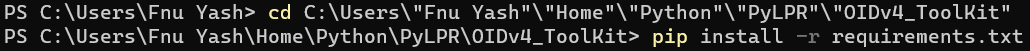

### Step 3: Training the Dataset
In the same directory, use the command:

```python main.py downloader --classes 'Vehicle registration plate' --type_csv train --limit 1500```

to download 1500 images from the "Vehicle Registration Plate" class.

### Step 4: Validation Dataset

Use the command:

```python main.py downloader --classes 'Vehicle registration plate' --type_csv validation --limit 300```

For validation, it is recommended to use about 20%-30% of the training dataset. (0.20(1500) = 300)

### Step 5: Converting Labels to YOLOv4 Format

1. Navigate to the OIDv4_Toolkit folder
2. Locate and open the "classes.txt" file
3. Edit it so that the only entry is: "Vehicle registration plate"
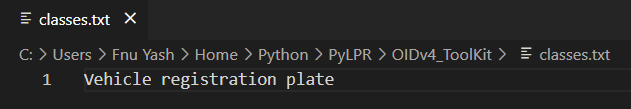
4. In your terminal, run the command: ```python convert_annotations.py```
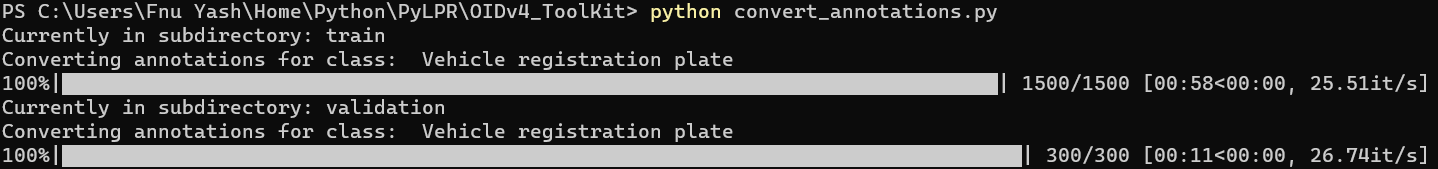
5. Navigate to OIDv4_Toolkit > OID > Dataset > train > Vehicle registration plate and delete the "Label" folder.
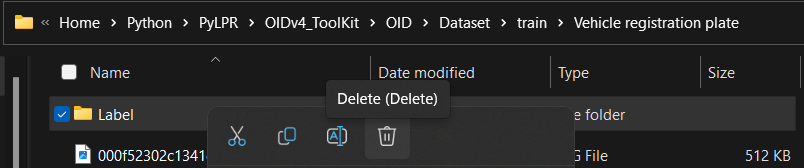
6. Navigate to OIDv4_Toolkit > OID > Dataset > validation > Vehicle registration plate and delete the "Label" folder.
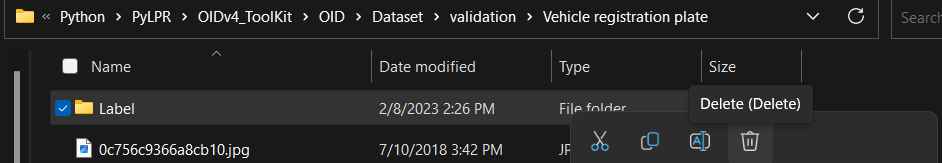



# Step 2: Moving the Custom Dataset Into a Cloud VM

1. Create a copy of both the train and validation folders which house the images.
2. Rename the copy of train to "obj"
3. Rename the copy of validation to "test"
4. Convert both folders to .zip
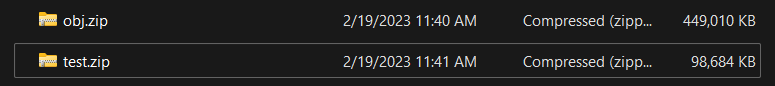
5. Upload both of the folders to the google drive folder.

In [ ]:
# Set Directory to /content

%cd ..

In [ ]:
# mount drive

from google.colab import drive
drive.mount("/content/gdrive")

In [ ]:
# set an alias so the path /mydrive leads to /content/gdrive/My\ Drive/

!ln -s /content/gdrive/My\ Drive/ /mydrive

In [ ]:
# confirm /mydrive leads to the google drive

!ls /mydrive

In [ ]:
# change directory back to /content/darknet

%cd darknet

In [ ]:
# Locate the PyLPR folder created in our google drive

!ls /mydrive/PyLPR

In [ ]:
# Copy the datasets into the Colab VM

!cp /mydrive/PyLPR/obj.zip ../
!cp /mydrive/PyLPR/test.zip ../

In [ ]:
# unzip the datasets

!unzip ../obj.zip -d data/obj
!unzip ../test.zip -d data/test

# Step 3: Configuring Files for Training


In [ ]:
# download cfg file to google drive and change its name

# !cp cfg/yolov4-custom.cfg /mydrive/PyLPR/yolov4-obj.cfg

In [ ]:
# download to local machine
# change file name to yolov4-obj.cfg after downloading

# download("cfg/yolov4-custom.cfg")

Now we need to edit our .cfg file.
1. Open the yolov4-obj.cfg file in a text editor.
2. Set the batch to 64.
3. Set the subdivisions to 16.
4. Set width to 416
5. Set height to 416
6. Set max_batches to 6000
7. Set steps to 4800, 5400
8. For each of the three yolo layers:
- set classes to 1
- set filters (found in [convulational] above the [yolo] to 18
9. Upload the edited .cfg file back to google drive.

**NOTE:** If any issues occur or training takes too long, change random to 0.


In [ ]:
# upload the edited .cfg file back to the cloud VM from Google Drive

!cp /mydrive/PyLPR/yolov4-obj.cfg ./cfg

1. Create a new file named obj.names with the class name.

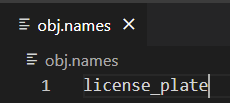
2. Create another file names obj.data and fill in:
```
classes = 1
train = data/train.txt
valid = data/test.txt
names = data/obj.names
backup = /mydrive/PyLPR/backup
```
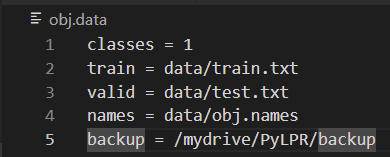
3. Upload both the obj.names and obj.data files to google drive.

In [ ]:
# upload the obj.names and obj.data files to our cloud VM from Google Drive

!cp /mydrive/PyLPR/obj.names ./data
!cp /mydrive/PyLPR/obj.data  ./data

4. Visit https://www.mediafire.com/folder/mwspieltktc3h/Generate_Files to download the generate_train.py and generate_test.py files.

5. Upload the files to Google Drive.
6. Navigate to files at the top left and make an "obj" and "test" folder within the data folder located inside darknet.

In [ ]:
# upload the generate_train.py and generate_test.py to cloud VM from Google Drive

!cp /mydrive/PyLPR/generate_train.py ./
!cp /mydrive/PyLPR/generate_test.py ./

In [ ]:
# run the newly uploaded files

!python generate_train.py
!python generate_test.py

In [ ]:
# verify that the new train.txt and test.txt files are availaible

!ls data/

# Step 4: Download the pre-trained weights

Download weights to increase model accuracy and decrease training time.

In [ ]:
# download the weights

!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

# Step 5: Train the Custom Object Detector

To ensure that the window does not time out, paste the following code into browser console window:

```
function ClickConnect() {
  console.log("Working");
  document
    .querySelector('#top-toolbar > colab-connect-button')
    .shadowRoot.querySelector('#connect')
    .click()
}
setInterval(ClickConnect, 60000)
```

In [ ]:
# train your custom detector

# !./darknet detector train data/obj.data cfg/yolov4-obj.cfg yolov4.conv.137 -dont_show -map

In [ ]:
# to retrain model from last saved place in case colab goes idle

# !./darknet detector train data/obj.data cfg/yolov4-obj.cfg /mydrive/PyLPR/backup/yolov4-obj_last.weights -dont_show

In [ ]:
# show a chart of how the training went

# imShow("chart.png")
# download("chart.png")

In [ ]:
# stop the run all command

# assert False

# Step 6: Checking the Mean Average Precision (mAP) of the model

Check for multiple saved weights in the backup to see which is the most accurate (highest mAP).

In [ ]:
# check mAP for weight specified in path

# !./darknet detector map data/obj.data cfg/yolov4-obj.cfg /mydrive/PyLPR/backup/yolov4-obj_4000.weights

# Step 7: Use the Custom Object Detector


In [ ]:
# set .cfg to test mode

%cd cfg
!sed -i "s/batch=64/batch=1/" yolov4-obj.cfg
!sed -i "s/subdivisions=16/subdivisions=1" yolov4-obf.cfg
%cd ..

Upload images to your google drive to test your custom detector.

In [ ]:
# run the custom detector on image in specified path

!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /mydrive/PyLPR/backup/yolov4-obj_4000.weights /mydrive/PyLPR/Images/R.jpg -dont_show -ext_output
imShow('predictions.jpg')

# Detections from OpenCV


In [ ]:
!pip install easyocr
!pip install imutils

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot
import easyocr

In [ ]:
x_start = int(input("Enter left_x: "))
x_end = x_start + (int(input("Enter width: ")) + 10)
y_start = int(input("Enter top_y: "))
y_end = y_start + (int(input("Enter height: ")) + 10)

In [ ]:
img = cv2.imread("predictions.jpg")
cropped_image = img[y_start:y_end, x_start:x_end]
pyplot.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image, detail = 1, paragraph = False)
result